In [1]:
import yfinance as yf
import pandas_ta as ta
#pip install zigzag
from zigzag import *
import quantstats as qs

In [2]:
#!pip install quantstats

In [3]:
# Data download
symbol = "EURUSD=X"
period ='3mo'
interval ='60m'

[*********************100%***********************]  1 of 1 completed
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0


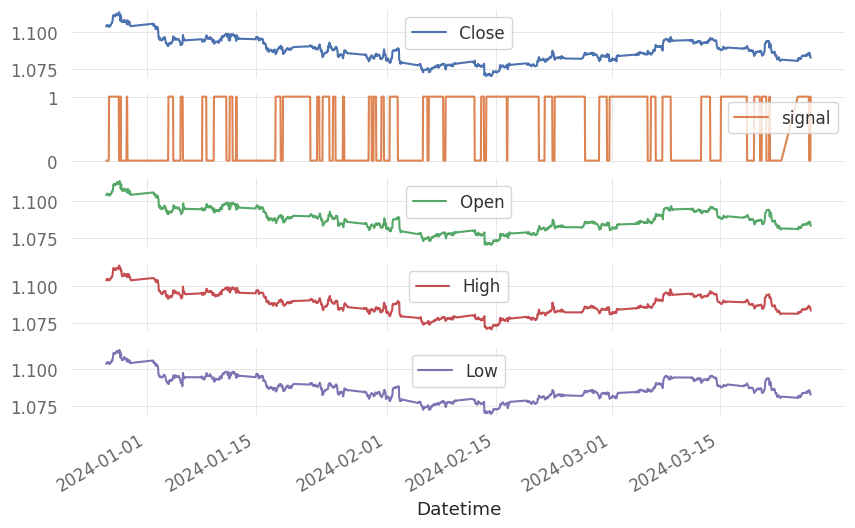

In [4]:
def get_yfinance_hist(symbol = "EURUSD=X", period ='max', interval ='15m', show_plot = True ):
    df_raw = yf.download(symbol,period= period ,interval=interval)
    df_raw["returns"] = np.log(df_raw.Close.div(df_raw.Close.shift(1)))
    df_raw.dropna(how="any",inplace=True)
    df_raw = df_raw.drop('Volume', axis=1)

    #Convert data into numpy array
    closing_prices = np.asarray(df_raw['Close'])

    #Calculate min/max points
    min_max_points = peak_valley_pivots(closing_prices, 0.002,-0.002)

    #Add as a column to the original df2
    df_raw['Min/Max Points'] = min_max_points

    #Replace all 0s with NaN values
    df_raw['Min/Max Points'] = df_raw['Min/Max Points'].replace(0,np.NaN)#Interpolate

    df_raw['signal'] = 0
    lastValue = 0
    df_raw['Min/Max Points'].fillna(0, inplace=True)
    for i, row in df_raw.iterrows():
        if row['Min/Max Points'] != 0:
            print(row['Min/Max Points'])
            
            if(row['Min/Max Points'] == -1):
              lastValue = 1
        
            if(row['Min/Max Points'] == 1):
              lastValue = 0
        
        df_raw.at[i,'signal'] = lastValue


    if(show_plot):
      plot_cols = ['Close', 'signal', 'Open', 'High', 'Low']
      plot_features = df_raw[plot_cols]
      plot_features.index = df_raw.index
      _ = plot_features.plot(subplots=True)

    df_raw = df_raw.dropna()

    return df_raw

df = get_yfinance_hist(symbol = symbol, period = period, interval= interval )

In [5]:

''' Backtests the SMA-based trading strategy.
'''
data = df.copy()
data["position"] = data["signal"]
data["strategy"] = data["position"].shift(1) * data["returns"]

data = data.dropna()

data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

data.head()

perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
print(round(perf, 6))
print(round(outperf, 6))

1.208818
0.227982


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-12-27   2023-12-27
End Period                 2024-03-26   2024-03-26
Risk-Free Rate             0.0%         0.0%
Time in Market             89.0%        48.0%

Cumulative Return          -1.87%       20.88%
CAGR﹪                     -5.16%       70.06%

Sharpe                     -0.26        4.2
Prob. Sharpe Ratio         26.41%       100.0%
Smart Sharpe               -0.25        4.07
Sortino                    -0.34        11.78
Smart Sortino              -0.33        11.43
Sortino/√2                 -0.24        8.33
Smart Sortino/√2           -0.23        8.08
Omega                      3.34         3.34

Max Drawdown               -3.86%       -0.19%
Longest DD Days            90           3
Volatility (ann.)          1.2%         0.75%
R^2                        0.45         0.45
Information Ratio          0.24         0.24
Calmar                 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-03-01,2024-03-01,2024-03-01,1,-0.194448,-0.108122
2,2024-02-19,2024-02-20,2024-02-20,2,-0.193843,-0.183082
3,2024-03-08,2024-03-08,2024-03-08,1,-0.185875,-0.164045
4,2024-02-23,2024-02-26,2024-02-26,3,-0.183935,-0.173134
5,2024-02-07,2024-02-07,2024-02-07,1,-0.172164,-0.096910


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


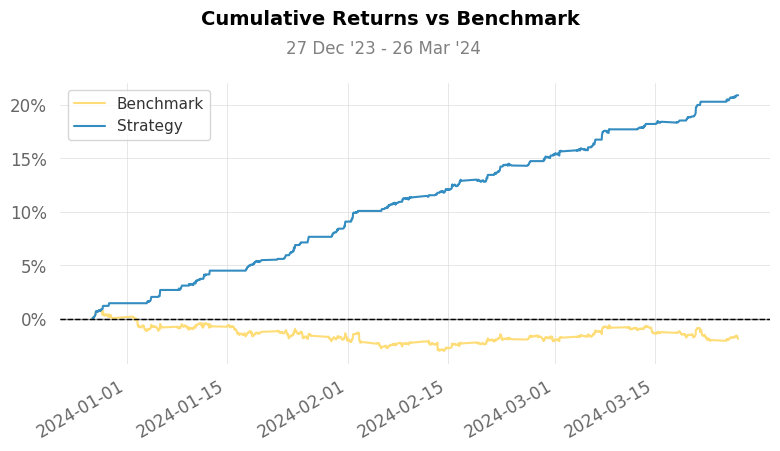

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


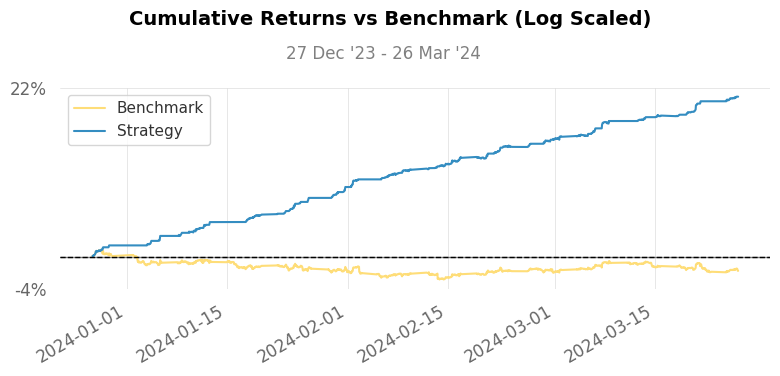

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


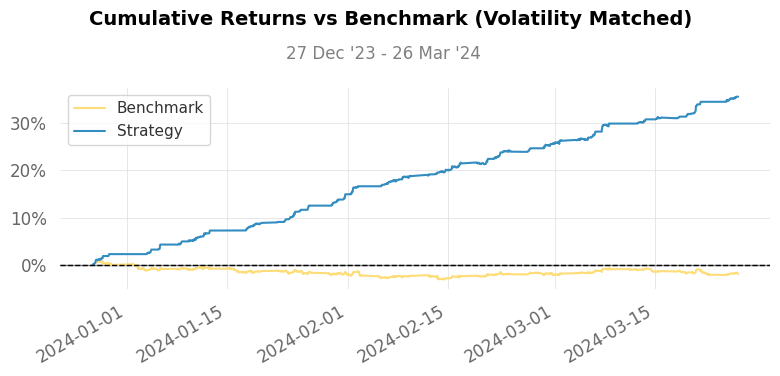

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


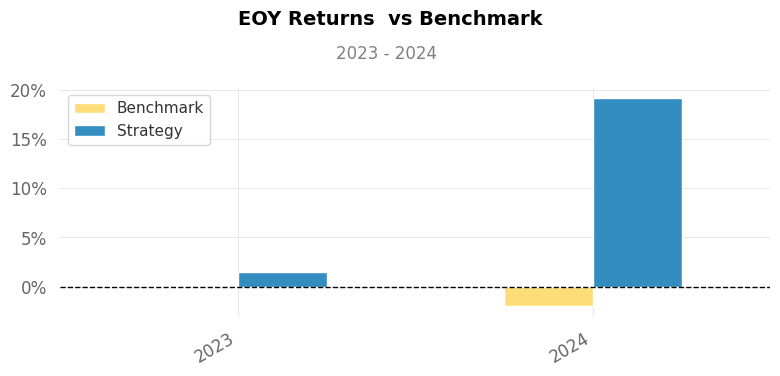

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


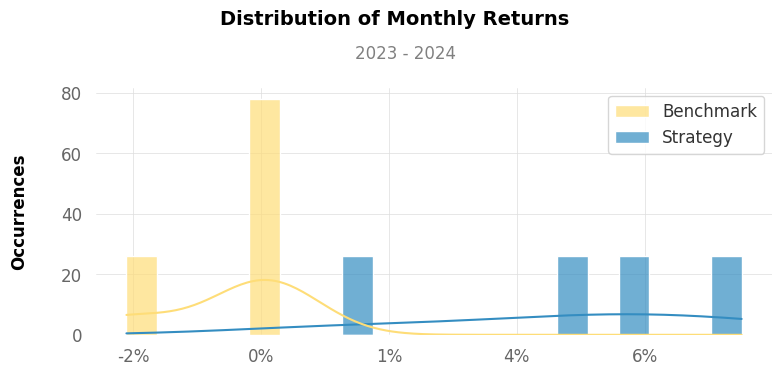

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


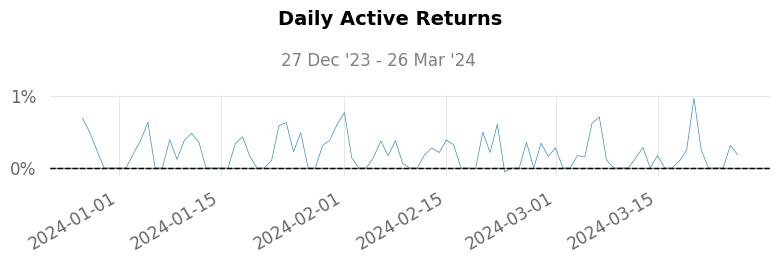

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


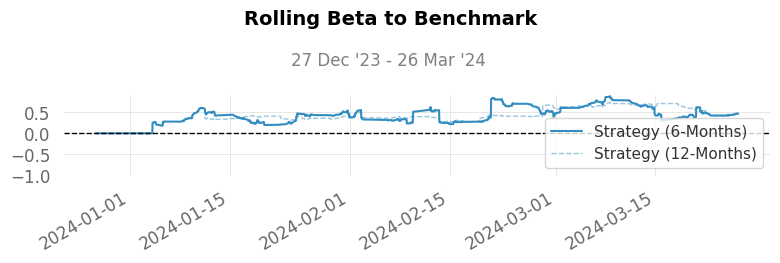

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


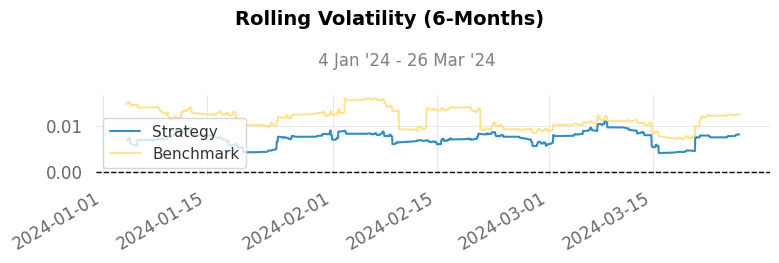

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


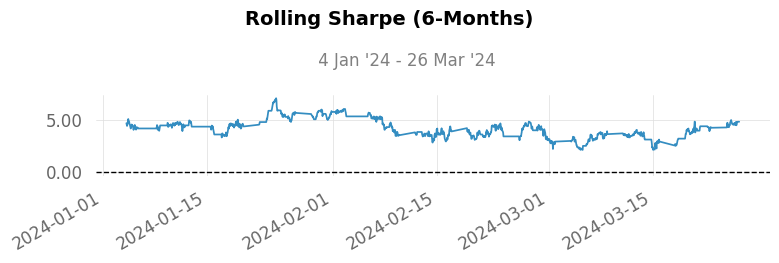

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


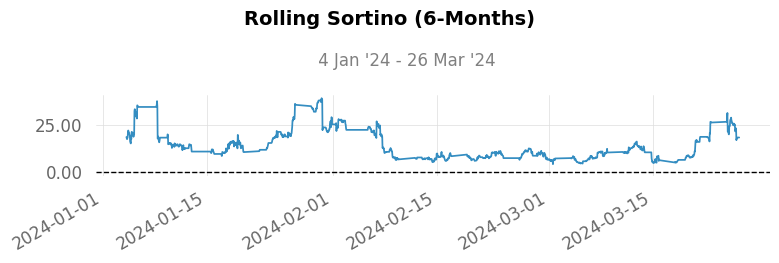

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


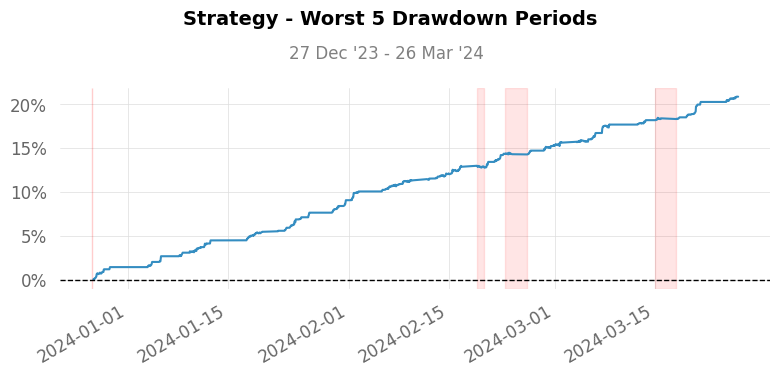

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


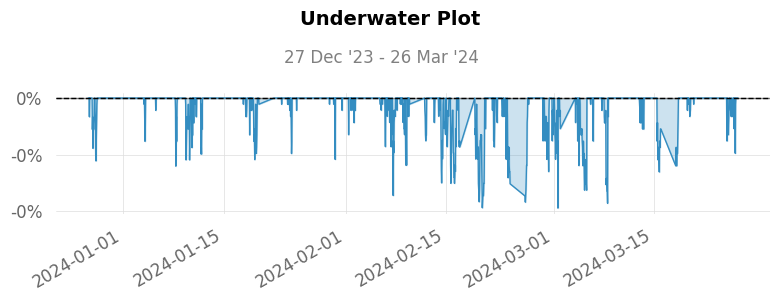

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


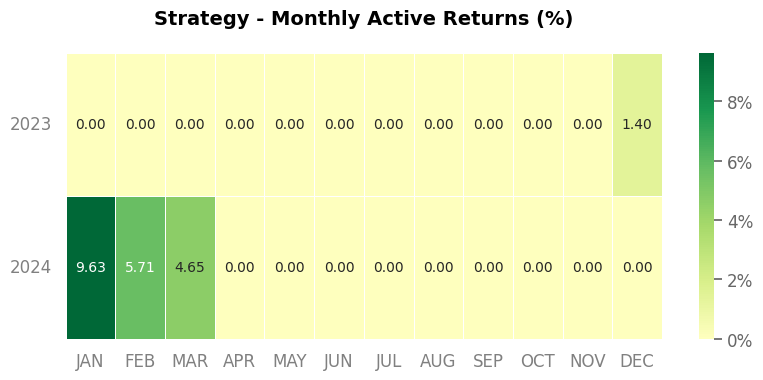

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


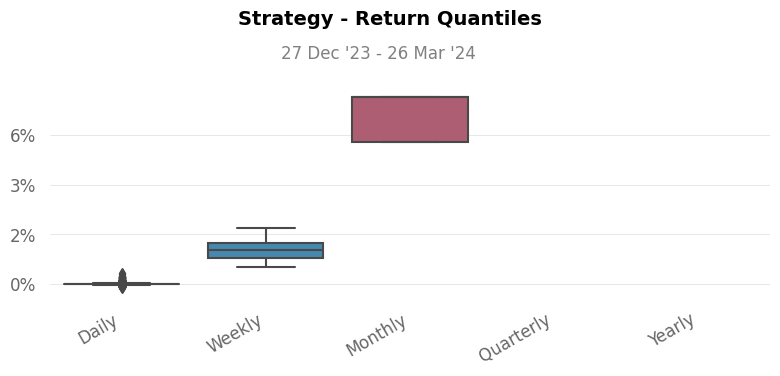

In [6]:
qs.reports.full(returns=data["cstrategy"], 
                benchmark=data["creturns"],
                output='report.html', 
                title='Volatility Targeted Strategy vs. Basic Strategy')